# Wilcoxon signed rank test: Two samples

## Summary

Test the hypothesis $H_{0} : m_{A} = m_{B}, \> m_{A} > m_{B}$, where $m_{A}, \> m_{B}$ are the underlying population medians of the number of lesions found on each half of the leaf after being coated by the two different virus preparations. (See description.)

## Introduction

**description:** Numbers of local lesions appearing on each half of eight leaves, after being rubbed by two preparations of different viruses.

## Method

Note that the test staistic $W$ is not quite equivalent to that expected by M248.

**note** : methodology differs to how the activity is carried out in the text.
Here we use the two samples of data directly, rather than using a single sample of the calculated differences.

## Results

### Setup the notebook

In [1]:
from src import load
from scipy.stats import wilcoxon, probplot
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# set the Seaborn theme
sns.set_theme()

### Load the data

In [3]:
# import the data
lesions = load.lesions()

In [4]:
# declare and assign parameters
ales = lesions["Alesions"]
bles = lesions["Blesions"]

### Describe the data

In [5]:
lesions.describe()

,Alesions,Blesions
count,8.000000,8.000000
mean,15.000000,11.000000
std,8.176622,4.956958
min,7.000000,5.000000
25%,8.750000,6.750000
50%,13.500000,10.500000
75%,18.500000,14.750000
max,31.000000,18.000000


### Visualise the data

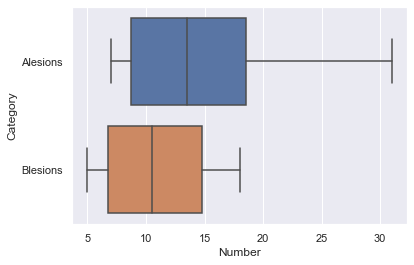

In [6]:
ax = sns.boxplot(data=lesions.melt(), x="value", y="variable")
ax.set(xlabel="Number", ylabel="Category")
plt.show()

### Check normality

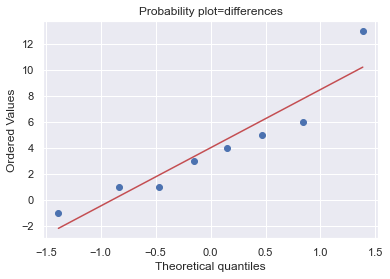

In [7]:
ax = plt.subplot()
probplot(ales-bles, plot=ax)
ax.set(title="Probability plot=differences")
plt.show()

The points lie mostly along a straight-line.
However, the point for the difference of 13 lies someway away from the line, so it maybe an outlier.

### Perform the test

In [8]:
# get medians
ales.median()

13.5

In [9]:
bles.median()

10.5

In [10]:
# get test statistic, p-value
wstat, pval = wilcoxon(x=ales, y=bles, alternative="greater")

In [11]:
wstat

34.0

In [12]:
pval

0.01171875

## Discussion

Gven $p \in$ (0.01, 0.05], there is moderate evidence against the null hypothesis.
The data indicates that the median difference in lesion counts is greater than zero; that is it leads to the conclusion that there is moderate to support the claim that virus A leads to more lesions on leaves than virus B.

It should be noted that that the sample size of $n=$8 is quite small, so the $p$-value given in the the test may not be that reliable.
Also, the outlier in the normal probability plot undermines the assumption of symmetry in the underlying population.